# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [2]:
#install spacy in the current conda environment
!pip install spacy


In [3]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 21.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt
import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [5]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [6]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [7]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [8]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [9]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [10]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [11]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [12]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [13]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

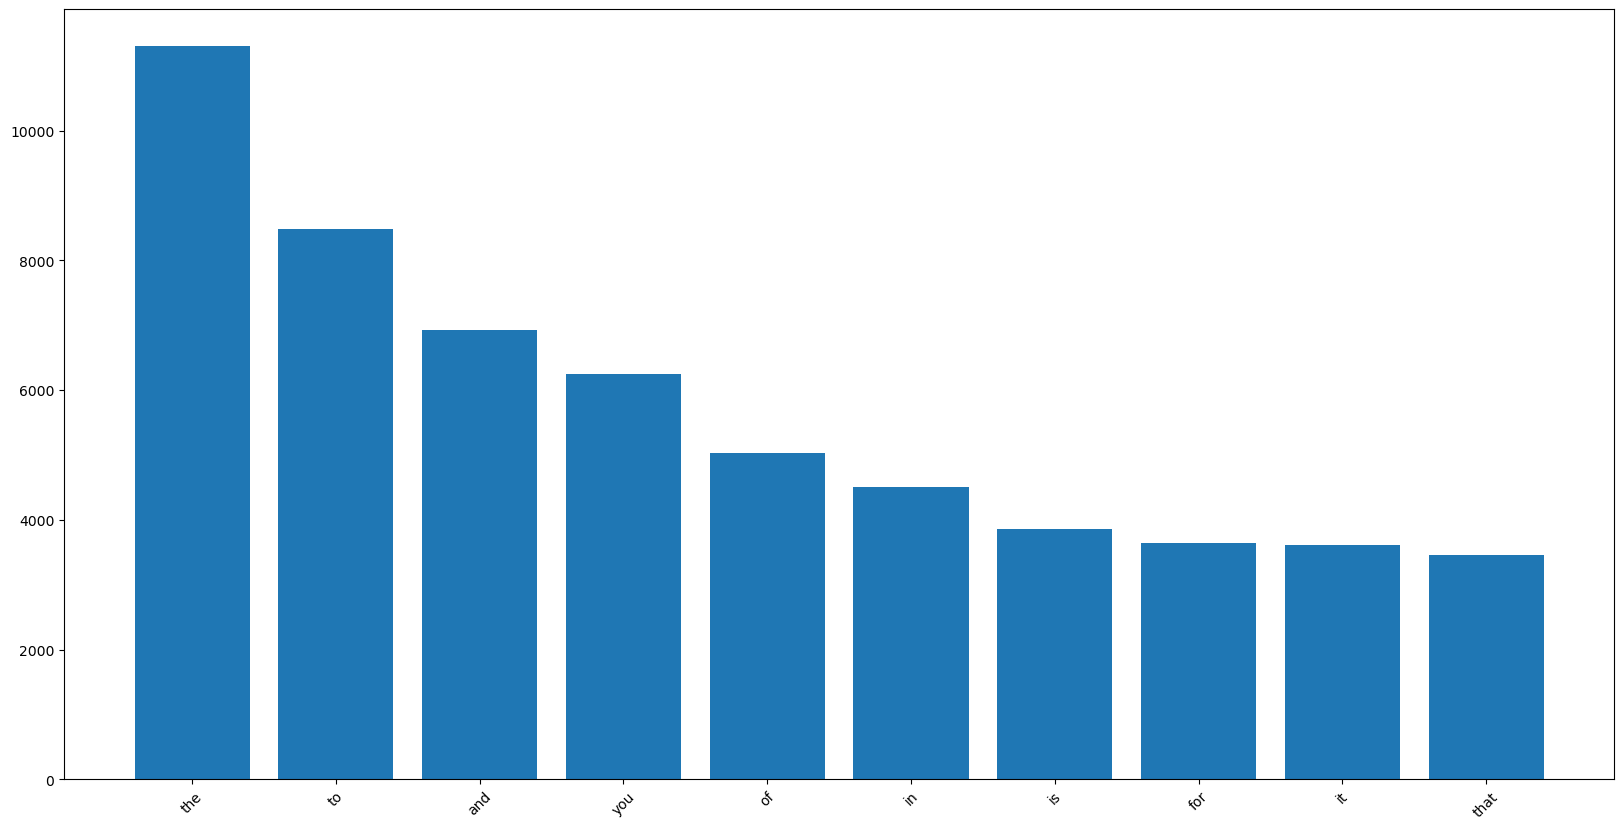

In [15]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?


In [16]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

Answer here: 
The words are the most common words. No it is not very useful for the studying community because it does not have a header or the names of each axis.

#### Lemmatization and stopword removal

In [17]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [18]:
mich['cleaned_text'] = mich['text'].apply(clean)

In [19]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [20]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [21]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8608 sparse matrix of type '<class 'numpy.int64'>'
	with 126768 stored elements in Compressed Sparse Row format>

In [22]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not              2863
student          1183
like             1183
people           1124
class             988
                 ... 
club campus         3
open not            3
open source         3
club activity       3
luck search         3
Length: 8608, dtype: int64

In [23]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

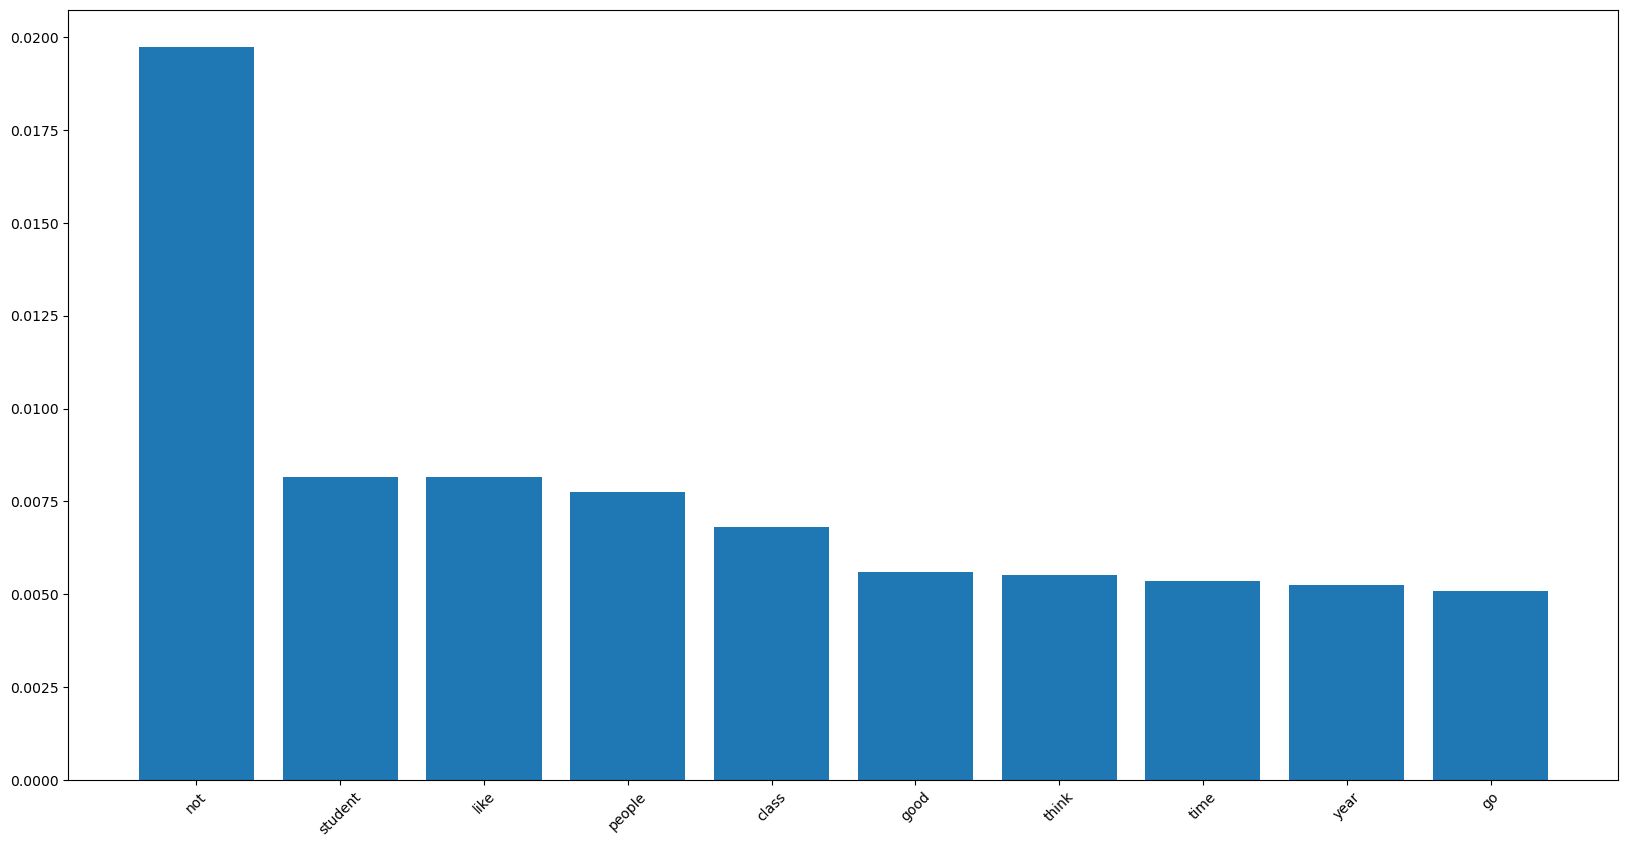

In [24]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [25]:
#pandas allows us to access specific words in the series using the index
word_counts["you"]

0.00013110048507179476

In [26]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["not", "student", "like", "people", "class"]]
plot_list

not        0.019755
student    0.008163
like       0.008163
people     0.007756
class      0.006817
dtype: float64

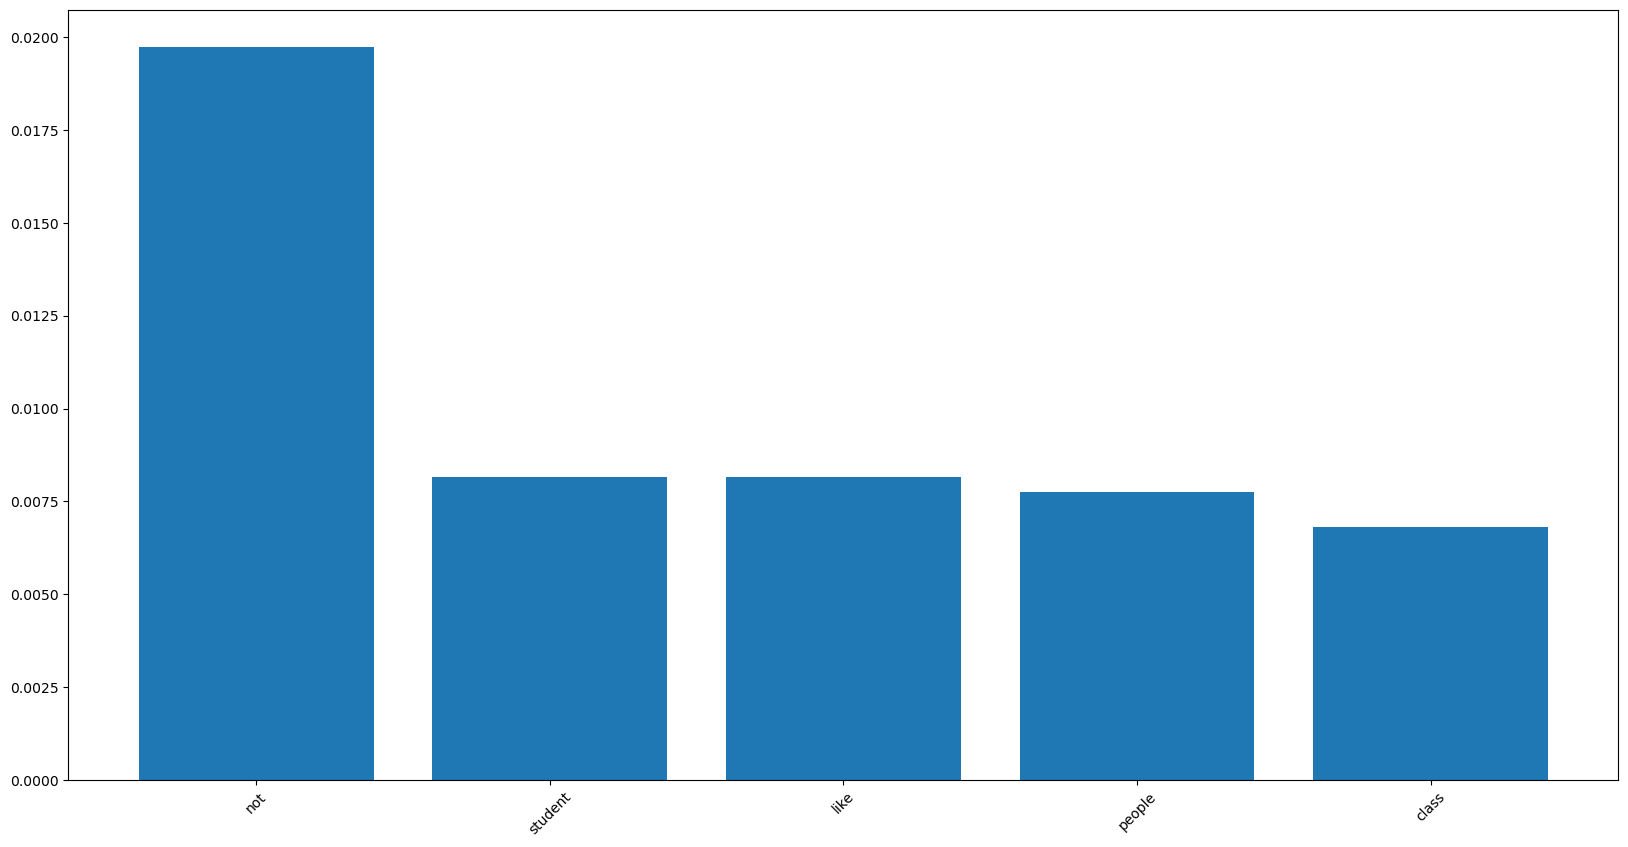

In [27]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

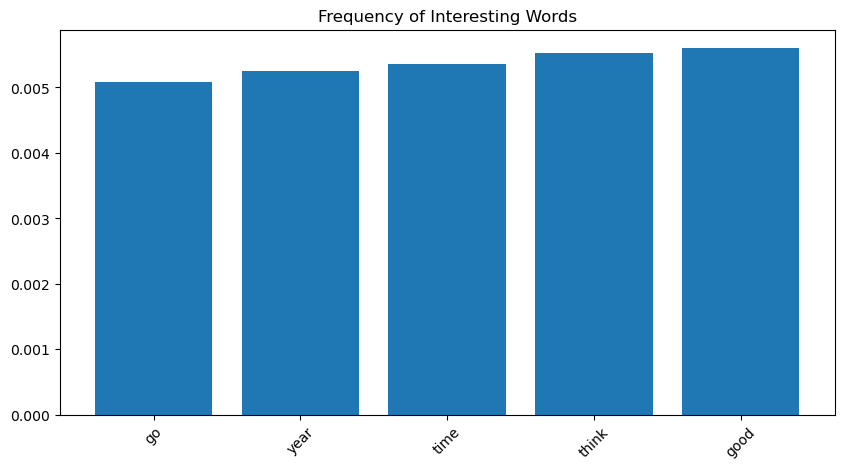

In [28]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

interesting_words = ['go', 'year', 'time', 'think', 'good']
interesting_counts = word_counts.loc[interesting_words]

plt.figure(figsize=(10,5))
plt.bar(interesting_counts.index, interesting_counts.values)
plt.title('Frequency of Interesting Words')
plt.xticks(rotation=45)
plt.show()

In [29]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [30]:
uiuc=pd.read_csv("uiuc.csv")


### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [31]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [32]:
#clean and lemmatize the data csvdef clean(text):
#remove newline and space characters
data['cleaned_text'] = data['text'].apply(clean)


In [33]:
#we can further process the text by removing stopwords and lemmatizing
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)

In [34]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(data['lemmatized_text'])

In [35]:
#train a logistic regression model using the bag of words features as X and the label column as y
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(bag_of_words, data['label'], test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)




In [36]:
#report the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7095238095238096


#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data. 



In [37]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 
print(f"Accuracy: {accuracy}")

Accuracy: 0.7095238095238096


#### Part 3: Examine the top features of your model using the following code

In [51]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?
feature_names = vectorizer.get_feature_names_out()
coefficients = log_reg.coef_[0]

In [52]:
coefficients = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)


In [54]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?
# Just the feature names
positive_feature_names = top_10_positive['feature'].values
negative_feature_names = top_10_negative['feature'].values

# Just the coefficients
positive_coefficients = top_10_positive['coefficient'].values
negative_coefficients = top_10_negative['coefficient'].values

# Now you can print them or use them in further analysis
print("Positive Feature Names:", positive_feature_names)
print("Positive Coefficients:", positive_coefficients)

print("Negative Feature Names:", negative_feature_names)
print("Negative Coefficients:", negative_coefficients)

Positive Feature Names: ['uiuc' 'rso' 'illinois' 'grainger' 'illini' 'champaign' 'urbana' 'las'
 'danville' 'quad day']
Positive Coefficients: [2.75979489 2.17860149 2.0050246  1.80342241 1.79227047 1.79202062
 1.73399074 1.6615156  1.64422887 1.42318573]
Negative Feature Names: ['hill' 'wolverine' 'csg' 'eec' 'um' 'diag' 'fresno' 'mcard' 'umich'
 'michigan']
Negative Coefficients: [-1.74146822 -1.75580109 -1.8369001  -1.90683451 -2.00534687 -2.01116406
 -2.13775168 -2.19932313 -2.31563797 -2.68128524]


This makes sense because the positive features for each school match the different common things at that school. The UIUC common words are things like the main library, the two towns surrounding it, and even a school name. The common words for michigan are their mascot, the nickname of their school, and the state.

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [56]:
import pandas as pd
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/madelynmcnamara/nltk_data...


True

In [57]:

uiuc = pd.read_csv('uiuc.csv')


def preprocess(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in text.lower().split() if word not in STOPWORDS]

uiuc['processed'] = uiuc['text'].map(preprocess)

In [58]:
dictionary = corpora.Dictionary(uiuc['processed'])
corpus = [dictionary.doc2bow(text) for text in uiuc['processed']]

In [59]:
# Train LDA model
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=15)

In [60]:
for i in range(10):
    print(f"Topic {i + 1}:")
    print(lda.print_topic(i, 10))

Topic 1:
0.022*"thank" + 0.006*"chinese" + 0.005*"joke" + 0.005*"😭" + 0.004*"suck" + 0.004*"try" + 0.004*"went" + 0.004*"couple" + 0.004*"st" + 0.004*"fine."
Topic 2:
0.011*"like" + 0.010*"good" + 0.009*"people" + 0.007*"weather" + 0.007*"need" + 0.006*"day" + 0.006*"open" + 0.006*"know" + 0.006*"it's" + 0.005*"you're"
Topic 3:
0.012*"i'm" + 0.010*"got" + 0.008*"friend" + 0.006*"it's" + 0.006*"i’m" + 0.006*"freshman" + 0.005*"want" + 0.005*"dm" + 0.005*"university" + 0.004*":("
Topic 4:
0.009*"water" + 0.008*"bike" + 0.007*"car" + 0.006*"pay" + 0.006*"parking" + 0.006*"like" + 0.006*"bus" + 0.005*"fee" + 0.005*"campus" + 0.004*"tap"
Topic 5:
0.006*"year" + 0.005*"dollar" + 0.005*"hair" + 0.004*"amtrak" + 0.004*"shit" + 0.004*"manage" + 0.004*"co2" + 0.003*"we’re" + 0.003*"ago" + 0.003*"art"
Topic 6:
0.010*"cleaning" + 0.006*"apartment" + 0.006*"[deleted]" + 0.004*"product" + 0.004*"review" + 0.004*"moved" + 0.004*"said" + 0.004*"fakespot" + 0.004*"carpet" + 0.004*"deposit"
Topic 7:
0.0

In [62]:
def get_dominant_topic(ldamodel, corpus, texts):
    # Initialize an empty list to store the dominant topics for each document
    dominant_topics = []
    
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # Sort with the most dominant topic first
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Percentage Contribution, and Keywords for each document
        topic_num, prop_topic = row[0]
        wp = ldamodel.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        dominant_topics.append({'Document_No': i, 'Dominant_Topic': topic_num, 'Perc_Contribution': prop_topic, 'Topic_Keywords': topic_keywords, 'Text': texts[i]})
    
    # Convert the list of dictionaries into a DataFrame
    df_dominant_topics = pd.DataFrame(dominant_topics)
    return df_dominant_topics

# Assuming `texts` is your list of documents (e.g., uiuc['text'].tolist())
dominant_topics_df = get_dominant_topic(lda, corpus, uiuc['text'].tolist())

# Now, you can print or analyze the DataFrame as needed
print(dominant_topics_df.head())

   Document_No  Dominant_Topic  Perc_Contribution   
0            0               7           0.620906  \
1            1               9           0.918091   
2            2               2           0.871305   
3            3               0           0.494045   
4            4               7           0.871107   

                                      Topic_Keywords   
0  time, class, it’s, you’re, like, going, maybe,...  \
1  u, i’m, lol, think, like, live, im, pipe, peop...   
2  i'm, got, friend, it's, i’m, freshman, want, d...   
3  thank, chinese, joke, 😭, suck, try, went, coup...   
4  time, class, it’s, you’re, like, going, maybe,...   

                                                Text  
0  Have the same professor! And in lecture he did...  
1  Do you find it helpful to still go to the lect...  
2  Have you tried emailing University Housing to ...  
3  Purchasing Illini Cash should get you added to...  
4  Just did, thanks for the suggestion! It hadn't...  


In [63]:
# Print out the topic keywords
topic_keywords = dominant_topics_df[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates()
print(topic_keywords)

    Dominant_Topic                                     Topic_Keywords
0                7  time, class, it’s, you’re, like, going, maybe,...
1                9  u, i’m, lol, think, like, live, im, pipe, peop...
2                2  i'm, got, friend, it's, i’m, freshman, want, d...
3                0  thank, chinese, joke, 😭, suck, try, went, coup...
5                4  year, dollar, hair, amtrak, shit, manage, co2,...
6                1  like, good, people, weather, need, day, open, ...
8                6  people, student, like, -, year, don't, know, d...
11               5  cleaning, apartment, [deleted], product, revie...
13               8  you!, thank, it's, ra, danville, woman, like, ...
31               3  water, bike, car, pay, parking, like, bus, fee...


In [64]:

for topic_num in sorted(dominant_topics_df['Dominant_Topic'].unique()):
    print(f"Comments for Topic {topic_num}:")
    highest_contrib_comments = dominant_topics_df[dominant_topics_df['Dominant_Topic'] == topic_num].sort_values(by='Perc_Contribution', ascending=False).head()
    for index, row in highest_contrib_comments.iterrows():
        print(f" - {row['Text']} (Contribution: {row['Perc_Contribution']})")
    print("\n")

Comments for Topic 0:
 - try being on the verge of a panic attack in a packed classroom full of strangers feeling like your mobility aid is getting in the way of everyone while you can barely stand… I found a seat where I could bro (Contribution: 0.9499741196632385)
 - Electric drum set is your friend.  Buy one for a couple hundred dollars and get a nice pair of headphones.  It's not the same, but it's good enough (Contribution: 0.939957320690155)
 - (tho' hailstorms are getting less freaky... and trees blowing down on cars, too.   Best to jus tleave the car behind :P ) (Contribution: 0.9399442076683044)
 - TP swipe over the seat, then TP resting on the raw toilet seat between the actual toilet seat if you know what I mean. (Contribution: 0.9356536269187927)
 - I noticed this too! in the bus I said “why is everyone white!!?” but then I realized how bad that sounded and added in WHITE SHIRTS (Contribution: 0.9307010769844055)


Comments for Topic 1:
 - Just adding that the National Weat


- **Topic 0** seems to capture **Personal Challenges and Practical Tips**, highlighting how students navigate personal struggles and share advice on dealing with everyday campus life.
- **Topic 1** focuses on **Information Sharing and Community Resources**, where students and community members exchange detailed information, helpful tips, and resources related to weather, health, and local services.
- **Topic 2** revolves around **Socializing and Making Connections**, discussing the challenges of making friends, connecting with others, and sharing course recommendations.

The topic model effectively distinguished between different facets of university life, from personal and social challenges to the sharing of valuable information within the UIUC community. The comments strongly aligned with their respective topics, demonstrating the model's ability to capture and highlight significant themes in the community discussions.